In [1]:
import pandas as pd

## 1- loading DataSets

In [2]:

df = pd.read_csv('../data/results.csv', encoding='latin-1')
df.head()


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2-Preprocessing 

In [3]:
df.dtypes

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [4]:
# Convert DateTime column to datetime type and extract only date (remove time)
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
# Convert back to datetime (but keeping only date part)
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [5]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop the 'Referee' column
df.drop(columns=['Referee'], inplace=True)


In [7]:
#drop the 'HTR' column
df.drop(columns=['HTR'], inplace=True)

In [8]:
# Convert 'Season' column to integer type by extracting the starting year
df['Season'] = df['Season'].str.split('-').str[0].astype(int)


In [9]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes

Season               int64
DateTime    datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

In [11]:
#drop seasons from 1993 to 1999
df.drop(df[(df['Season'] >= 1993) & (df['Season'] < 2000)].index, inplace=True)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000,2000-08-19,Charlton,Man City,4,0,H,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000,2000-08-19,Chelsea,West Ham,4,2,H,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000,2000-08-19,Coventry,Middlesbrough,1,3,A,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000,2000-08-19,Derby,Southampton,2,2,D,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000,2000-08-19,Leeds,Everton,2,0,H,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [12]:
#reset index after dropping rows
df.reset_index(drop=True, inplace=True)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000,2000-08-19,Charlton,Man City,4,0,H,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000,2000-08-19,Chelsea,West Ham,4,2,H,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000,2000-08-19,Coventry,Middlesbrough,1,3,A,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000,2000-08-19,Derby,Southampton,2,2,D,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000,2000-08-19,Leeds,Everton,2,0,H,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [13]:
#map 'FTR' column to numerical values: 'H' = 1, 'A' = -1, 'D' = 0
df['FTR'] = df['FTR'].map({'H': 1, 'A': -1, 'D': 0})


In [14]:
#convert 'FTR' column to float64 type
df['FTR'] = df['FTR'].astype('float64')


In [15]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000,2000-08-19,Charlton,Man City,4,0,1.0,2.0,0.0,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000,2000-08-19,Chelsea,West Ham,4,2,1.0,1.0,0.0,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000,2000-08-19,Coventry,Middlesbrough,1,3,-1.0,1.0,1.0,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000,2000-08-19,Derby,Southampton,2,2,0.0,1.0,2.0,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000,2000-08-19,Leeds,Everton,2,0,1.0,2.0,0.0,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [16]:
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8284,2021,2022-04-09,Aston Villa,Tottenham,0,4,-1.0,0.0,1.0,9.0,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
8285,2021,2022-04-10,Brentford,West Ham,2,0,1.0,0.0,0.0,15.0,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
8286,2021,2022-04-10,Leicester,Crystal Palace,2,1,1.0,2.0,0.0,12.0,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
8287,2021,2022-04-10,Norwich,Burnley,2,0,1.0,1.0,0.0,17.0,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
8288,2021,2022-04-10,Man City,Liverpool,2,2,0.0,2.0,1.0,11.0,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [17]:
df.dtypes

Season               int64
DateTime    datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                float64
HTHG               float64
HTAG               float64
HS                 float64
AS                 float64
HST                float64
AST                float64
HC                 float64
AC                 float64
HF                 float64
AF                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
dtype: object

## ploting 

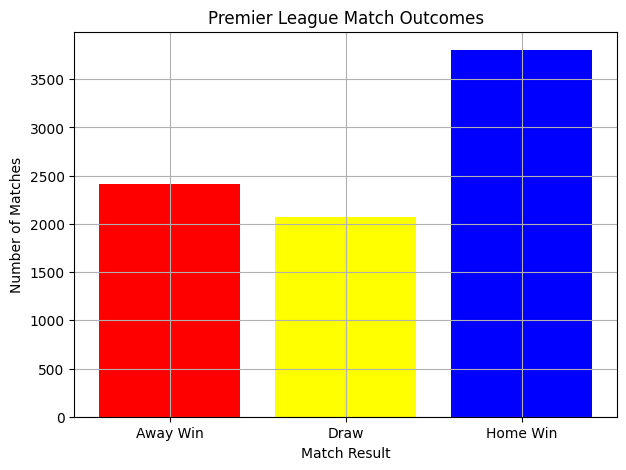

FTR
Away Win    2417
Draw        2069
Home Win    3803
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
counts = df['FTR'].value_counts().sort_index()

outcome_labels = {-1: 'Away Win', 0: 'Draw', 1: 'Home Win'}
counts.index = counts.index.map(outcome_labels)

plt.figure(figsize=(7,5))
plt.bar(counts.index, counts.values, color=['red', 'yellow', 'blue'])
plt.title("Premier League Match Outcomes")
plt.xlabel("Match Result")
plt.ylabel("Number of Matches")
plt.grid()
plt.show()
print(counts)

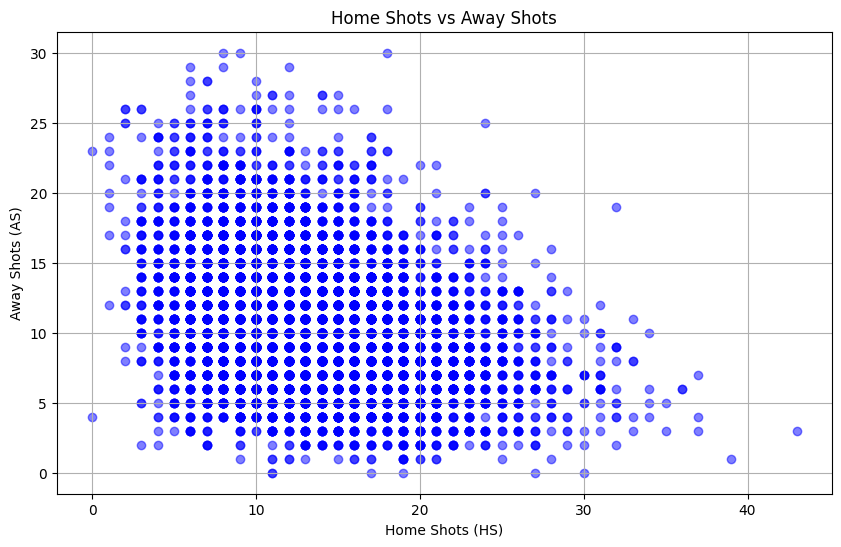

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['HS'], df['AS'], alpha=0.5,color='blue')
plt.xlabel('Home Shots (HS)')
plt.ylabel('Away Shots (AS)')
plt.title('Home Shots vs Away Shots')
plt.grid(True)
plt.show()

In [20]:
counthome = df['HomeTeam'].value_counts()
countaway = df['AwayTeam'].value_counts()
all=countaway+counthome
all.sort_values(ascending=False)

Man United          829
Tottenham           829
Liverpool           829
Arsenal             828
Chelsea             828
Everton             828
Man City            791
Newcastle           753
West Ham            716
Aston Villa         715
Fulham              570
Southampton         563
Sunderland          532
West Brom           494
Bolton              418
Blackburn           418
Leicester           409
Stoke               380
Middlesbrough       380
Crystal Palace      373
Wigan               304
Wolves              298
Burnley             296
Swansea             266
Charlton            266
Portsmouth          266
Birmingham          266
Norwich             259
Watford             259
Leeds               222
Hull                190
Bournemouth         190
Brighton            183
Reading             114
QPR                 114
Derby               114
Sheffield United    114
Huddersfield         76
Ipswich              76
Cardiff              76
Blackpool            38
Bradford        

## -----------------------------------------------feature engeniring----------------------------------------

##  ----------------------------------------------avg goals for each team---------------------------------------

In [21]:

def add_avg_goals_features_team_grouped(df, window=10):

    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_avg_goals_last10'] = 0.0
    df['away_team_avg_goals_last10'] = 0.0


    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    # Process each team
    for team in all_teams:

        #  Get all matches for this team
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTHG']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['goals_scored'] = team_home_matches['FTHG']

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTAG']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['goals_scored'] = team_away_matches['FTAG']

        #  merge
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'goals_scored']],
            team_away_matches[['DateTime', 'place', 'goals_scored']]
        ]).sort_values('DateTime').reset_index(drop=True)

        #  avg
        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                # Calculate average of previous matches
                start_idx = max(0, i - window)
                previous_goals = team_all_matches['goals_scored'].iloc[start_idx:i]
                avg = previous_goals.mean()

            averages.append(avg)

        #Map back to original dataframe
        team_all_matches['averages'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['averages']))

        #
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_avg_goals_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_avg_goals_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

df = add_avg_goals_features_team_grouped(df, window=10)


In [22]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HC,AC,HF,AF,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,2.0,9.0,10.0,21.0,3.0,1.0,0.0,1.0,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,0.000000,1.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,8.0,3.0,12.0,15.0,0.0,1.0,0.0,0.0,1.000000,2.000000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,7.0,6.0,16.0,22.0,3.0,1.0,0.0,0.0,1.666667,2.333333
45,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,4.0,10.0,17.0,13.0,0.0,2.0,0.0,0.0,0.500000,2.250000
54,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,8.0,4.0,5.0,13.0,1.0,2.0,0.0,0.0,2.000000,1.000000
66,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,4.0,7.0,8.0,13.0,1.0,2.0,0.0,0.0,1.166667,2.000000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,3.0,11.0,18.0,17.0,2.0,3.0,0.0,0.0,1.857143,2.857143
85,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,7.0,4.0,12.0,20.0,1.0,4.0,0.0,1.0,1.750000,1.571429
89,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,5.0,4.0,15.0,11.0,1.0,0.0,0.0,0.0,1.222222,1.666667


##  ----------------------------------------------avg conversion for each team---------------------------------------

In [23]:
#abudlmajeed
def add_conversion_rate_features(df, window=10):
    """
    Add offensive efficiency features (conversion rate)
    for home and away teams based on recent matches.
    """

    df = df.sort_values('DateTime').reset_index(drop=True).copy()


    df['home_conversion_rate_last10'] = 0.0
    df['away_conversion_rate_last10'] = 0.0


    for idx in range(len(df)):
        if idx % 1000 == 0:
            print(f"Processed {idx}/{len(df)} matches")

        current_match = df.iloc[idx]
        home_team = current_match['HomeTeam']
        away_team = current_match['AwayTeam']
        current_date = current_match['DateTime']


        prev_matches = df[df['DateTime'] < current_date]


        home_prev = prev_matches[
            (prev_matches['HomeTeam'] == home_team) |
            (prev_matches['AwayTeam'] == home_team)
        ].tail(window)

        if len(home_prev) > 0:
            goals, shots = [], []
            for _, m in home_prev.iterrows():
                if m['HomeTeam'] == home_team:
                    goals.append(m['FTHG'])
                    shots.append(m['HS'])
                else:
                    goals.append(m['FTAG'])
                    shots.append(m['AS'])

            if sum(shots) > 0:
                df.loc[idx, 'home_conversion_rate_last10'] = sum(goals) / sum(shots)


        away_prev = prev_matches[
            (prev_matches['HomeTeam'] == away_team) |
            (prev_matches['AwayTeam'] == away_team)
        ].tail(window)

        if len(away_prev) > 0:
            goals, shots = [], []
            for _, m in away_prev.iterrows():
                if m['HomeTeam'] == away_team:
                    goals.append(m['FTHG'])
                    shots.append(m['HS'])
                else:
                    goals.append(m['FTAG'])
                    shots.append(m['AS'])
            if sum(shots) > 0:
                df.loc[idx, 'away_conversion_rate_last10'] = sum(goals) / sum(shots)

    print("Conversion rate features created successfully!")
    return df

In [24]:
df=add_conversion_rate_features(df, window=10)

Processed 0/8289 matches
Processed 1000/8289 matches
Processed 2000/8289 matches
Processed 3000/8289 matches
Processed 4000/8289 matches
Processed 5000/8289 matches
Processed 6000/8289 matches
Processed 7000/8289 matches
Processed 8000/8289 matches
Conversion rate features created successfully!


In [25]:

df[(df['HomeTeam']=='Liverpool') | (df['AwayTeam']=='Liverpool')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HF,AF,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10
6,2000,2000-08-19,Liverpool,Bradford,1,0,1.0,0.0,0.0,16.0,...,8.0,8.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,25.0,20.0,2.0,4.0,1.0,2.0,0.000000,1.000000,0.000000,0.062500
26,2000,2000-08-26,Southampton,Liverpool,3,3,0.0,0.0,1.0,14.0,...,7.0,6.0,0.0,0.0,0.0,0.0,1.500000,0.500000,0.120000,0.043478
38,2000,2000-09-06,Liverpool,Aston Villa,3,1,1.0,3.0,0.0,11.0,...,13.0,7.0,0.0,2.0,0.0,0.0,1.333333,0.500000,0.125000,0.058824
43,2000,2000-09-09,Liverpool,Man City,3,2,1.0,1.0,0.0,14.0,...,17.0,17.0,3.0,4.0,0.0,0.0,1.750000,1.750000,0.162791,0.155556
57,2000,2000-09-17,West Ham,Liverpool,1,1,0.0,0.0,1.0,15.0,...,5.0,13.0,0.0,2.0,0.0,0.0,1.000000,2.000000,0.068493,0.175439
66,2000,2000-09-23,Liverpool,Sunderland,1,1,0.0,1.0,1.0,11.0,...,14.0,18.0,2.0,2.0,0.0,0.0,1.833333,1.000000,0.171875,0.095238
77,2000,2000-10-01,Chelsea,Liverpool,3,0,1.0,2.0,0.0,11.0,...,14.0,14.0,1.0,1.0,0.0,0.0,1.428571,1.714286,0.107527,0.160000
87,2000,2000-10-15,Derby,Liverpool,0,4,-1.0,0.0,1.0,6.0,...,18.0,13.0,1.0,1.0,0.0,0.0,1.750000,1.500000,0.179487,0.141176
94,2000,2000-10-21,Liverpool,Leicester,1,0,1.0,0.0,0.0,24.0,...,8.0,10.0,1.0,2.0,0.0,0.0,1.777778,0.777778,0.158416,0.081395


##  ----------------------------------------------avg winrate for each team---------------------------------------

In [26]:
def add_avg_winrate_team(df, window=10):
    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_winrate_last10'] = 0.0
    df['away_team_winrate_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTR']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['win'] = (team_home_matches['FTR'] == 1).astype(int)

        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTR']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['win'] = (team_away_matches['FTR'] == -1).astype(int)

        # Combine
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'win']],
            team_away_matches[['DateTime', 'place', 'win']]
        ]).sort_values('DateTime').reset_index(drop=True)

        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                start_idx = max(0, i - window)
                previous_wins = team_all_matches['win'].iloc[start_idx:i]
                avg = previous_wins.mean()

            averages.append(avg)

        team_all_matches['avg_winrate'] = averages


        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg_winrate']))

        # Apply to original dataframe based on home/away position
        # For home team
        home_bool = df['HomeTeam'] == team
        df.loc[home_bool, 'home_team_winrate_last10'] = df.loc[home_bool, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_bool = df['AwayTeam'] == team
        df.loc[away_bool, 'away_team_winrate_last10'] = df.loc[away_bool, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_winrate_team(df, window=10)


In [27]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HY,AY,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,3.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,2.0,4.0,1.0,2.0,0.000000,1.000000,0.000000,0.062500,0.000000,1.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.0,1.0,0.0,0.0,1.000000,2.000000,0.064516,0.160000,0.500000,0.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,3.0,1.0,0.0,0.0,1.666667,2.333333,0.119048,0.142857,0.333333,0.666667
46,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.0,2.0,0.0,0.0,0.500000,2.250000,0.068966,0.145161,0.250000,0.500000
53,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,1.0,2.0,0.0,0.0,2.000000,1.000000,0.125000,0.113636,0.400000,0.400000
62,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,1.0,2.0,0.0,0.0,1.166667,2.000000,0.092105,0.122449,0.333333,0.500000
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,2.0,3.0,0.0,0.0,1.857143,2.857143,0.120370,0.188679,0.428571,0.571429
84,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,1.0,4.0,0.0,1.0,1.750000,1.571429,0.121739,0.157143,0.500000,0.428571
91,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,1.0,0.0,0.0,0.0,1.222222,1.666667,0.090909,0.114504,0.111111,0.555556


##  ----------------------------------------------avg Conceded for each team---------------------------------------


In [29]:
def add_avg_goals_conceded_features_team_grouped(df, window=10):

    df = df.sort_values('DateTime').reset_index(drop=True).copy()

    df['home_team_avg_goals_conceded_last10'] = 0.0
    df['away_team_avg_goals_conceded_last10'] = 0.0

    # Get all unique teams
    all_teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())

    for team in all_teams:

        # Get all matches for this team (home + away)
        # When team plays at home, they concede FTAG (away goals)
        team_home_matches = df[df['HomeTeam'] == team][['DateTime', 'FTAG']].copy()
        team_home_matches['place'] = 'home'
        team_home_matches['goals_conceded'] = team_home_matches['FTAG']

        # When team plays away, they concede FTHG (home goals)
        team_away_matches = df[df['AwayTeam'] == team][['DateTime', 'FTHG']].copy()
        team_away_matches['place'] = 'away'
        team_away_matches['goals_conceded'] = team_away_matches['FTHG']

        #  Combine and sort by datetime ascending
        team_all_matches = pd.concat([
            team_home_matches[['DateTime', 'place', 'goals_conceded']],
            team_away_matches[['DateTime', 'place', 'goals_conceded']]
        ]).sort_values('DateTime').reset_index(drop=True)

        # Calculate rolling average (starting from 0)
        averages = []

        for i in range(len(team_all_matches)):
            if i == 0:
                # no previous history
                avg = 0.0
            else:
                # Calculate average of previous matches
                start_idx = max(0, i - window)
                previous_goals = team_all_matches['goals_conceded'].iloc[start_idx:i]
                avg = previous_goals.mean()

            averages.append(avg)

        # Map back to original dataframe
        team_all_matches['avg'] = averages

        # Create lookup dictionary by datetime
        team_avg_dict = dict(zip(team_all_matches['DateTime'], team_all_matches['avg']))

        # Step 5: Apply to original dataframe based on home/away position
        # For home team
        home_mask = df['HomeTeam'] == team
        df.loc[home_mask, 'home_team_avg_goals_conceded_last10'] = df.loc[home_mask, 'DateTime'].map(team_avg_dict).fillna(0)

        # For away team
        away_mask = df['AwayTeam'] == team
        df.loc[away_mask, 'away_team_avg_goals_conceded_last10'] = df.loc[away_mask, 'DateTime'].map(team_avg_dict).fillna(0)

    return df

# Apply the function
df = add_avg_goals_conceded_features_team_grouped(df, window=10)


In [30]:
df[(df['HomeTeam']=='Arsenal') | (df['AwayTeam']=='Arsenal')].head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,...,HR,AR,home_team_avg_goals_last10,away_team_avg_goals_last10,home_conversion_rate_last10,away_conversion_rate_last10,home_team_winrate_last10,away_team_winrate_last10,home_team_avg_goals_conceded_last10,away_team_avg_goals_conceded_last10
7,2000,2000-08-19,Sunderland,Arsenal,1,0,1.0,0.0,0.0,8.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2000,2000-08-21,Arsenal,Liverpool,2,0,1.0,1.0,0.0,17.0,...,1.0,2.0,0.000000,1.000000,0.000000,0.062500,0.000000,1.000000,1.000000,0.000000
19,2000,2000-08-26,Arsenal,Charlton,5,3,1.0,1.0,2.0,18.0,...,0.0,0.0,1.000000,2.000000,0.064516,0.160000,0.500000,0.500000,0.500000,1.500000
34,2000,2000-09-06,Chelsea,Arsenal,2,2,0.0,1.0,0.0,12.0,...,0.0,0.0,1.666667,2.333333,0.119048,0.142857,0.333333,0.666667,1.666667,1.333333
39,2000,2000-09-09,Bradford,Arsenal,1,1,0.0,1.0,0.0,9.0,...,0.0,0.0,0.500000,2.250000,0.068966,0.145161,0.250000,0.500000,1.750000,1.500000
51,2000,2000-09-16,Arsenal,Coventry,2,1,1.0,1.0,0.0,18.0,...,0.0,0.0,2.000000,1.000000,0.125000,0.113636,0.400000,0.400000,1.400000,1.400000
66,2000,2000-09-23,Ipswich,Arsenal,1,1,0.0,0.0,0.0,17.0,...,0.0,0.0,1.166667,2.000000,0.092105,0.122449,0.333333,0.500000,1.500000,1.333333
76,2000,2000-10-01,Arsenal,Man United,1,0,1.0,1.0,0.0,7.0,...,0.0,0.0,1.857143,2.857143,0.120370,0.188679,0.428571,0.571429,1.285714,1.000000
79,2000,2000-10-14,Arsenal,Aston Villa,1,0,1.0,0.0,0.0,16.0,...,0.0,1.0,1.750000,1.571429,0.121739,0.157143,0.500000,0.428571,1.125000,1.000000
92,2000,2000-10-21,West Ham,Arsenal,1,2,-1.0,0.0,2.0,11.0,...,0.0,0.0,1.222222,1.666667,0.090909,0.114504,0.111111,0.555556,1.333333,1.000000


##  ----------------------------------------------home advantage "working on it"---------------------------------------


## --------------------------------------------------ML Model------------------------------------------------------------

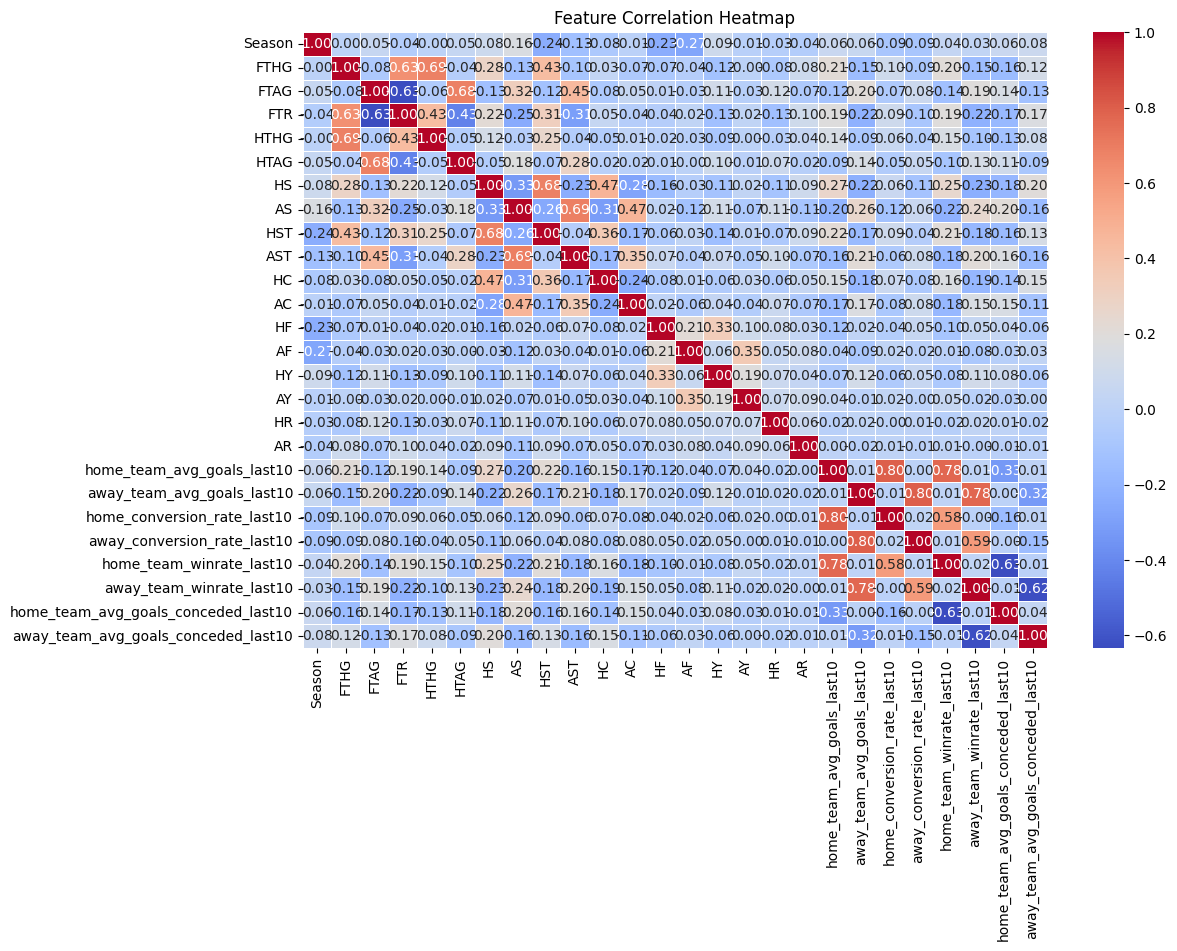

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['HomeTeam'] = le.fit_transform(df['HomeTeam'])
df['AwayTeam'] = le.fit_transform(df['AwayTeam'])


features = [
    'home_team_avg_goals_last10',
    'away_team_avg_goals_last10',
    'home_conversion_rate_last10',
    'away_conversion_rate_last10',
    'home_team_winrate_last10',
    'away_team_winrate_last10',
    'home_team_avg_goals_conceded_last10',
    'away_team_avg_goals_conceded_last10'
]
X = df[features]
y = df['FTR']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_score=model.score(X_train, y_train)
print("Train Accuracy:", train_score)
test_score=model.score(X_test, y_test)
print("Test Accuracy:", test_score)


Train Accuracy: 0.5175801447776629
Test Accuracy: 0.5150784077201448
